<a href="https://colab.research.google.com/github/Kacper-Sawicz/Dedensification_of_graphs/blob/main/Dedensification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dedensification of the graph algorithm based on Antonio Macconi paper from 2016

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import math
import pprint
import copy
from itertools import chain
import pandas as pd
import csv
from collections import Counter
import tabulate

In [ ]:
#creating a Figure 1 and Figure 2 example as in the paper by Macconi
N_f1 = [1, 2, 3, 4, 5, 6, 'A', 'B', 'C']
E_f1 = [[1,'A'], [1,'B'], [1,'C'], [2,'A'], [2,'B'], [2,'C'], [3,'A'], [3,'B'], [3,'C'], [4,'A'], [4,'B'], [4,'C'],
        [5,'A'], [5,'B'], [5,'C'], [6,'A'], [6,'B'], [6,'C']]

N_f2 = [1, 2, 3, 4, 5, 6, 'A', 'B', 'C']
E_f2 = [[1,'B'], [1,'C'], [2,'A'], [2,'B'], [2,'C'], [3,'A'], [3,'B'], [3,6], [4,'A'], [4,'B'], [4,'C'], [5,'A'], [5,'B'], [6,5], ['A',6]]

In [ ]:
def high_or_low(N, E, T): #checking degree of a node, the flip is based on parameter T
  destination = []
  N_h = []
  N_l = []
  for i in E:
    destination.append(i[1])
  for i in N:
    if destination.count(i) >= T:
      N_h.append(i)
    else:
      N_l.append(i)
  return N_h, N_l

In [ ]:
Nh_f1, Nl_f1 = high_or_low(N_f1, E_f1, 3)
Nh_f2, Nl_f2 = high_or_low(N_f2, E_f2, 3)

In [ ]:
def dedensification(N_h, N_l, E):

  W = [] #initializing auxiliary map for constraint 1
  N_c = []
  E_p = copy.deepcopy(E)

  for i in (N_h + N_l):
    H = [p[1] for p in E if p[0]==i and p[1] in N_h] #select the outgoing high-degree nodes of i
    if H:
      check = 0
      for t in W:
        if t[0] == H:
          t[1].append(i)
          check += 1
      if check == 0:
        W.append([H, [i]])

  for q in W:
    if len(q[0])*len(q[1]) > len(q[0]) + len(q[1]): #optimisation constraint
      n_c = str(q[0]) #introducing a new node
      for p in q[1]:
        for r in q[0]:
          E_p.remove([p,r])
        E_p.append([p, n_c])
      for s in q[0]:
        E_p.append([n_c, s])
      N_c.append(n_c)

  return [N_h, N_l, N_c, E_p]

Figure 1

In [ ]:
[Nh_f1, Nl_f1, Nc_f1, E_prime_f1] = dedensification(Nh_f1, Nl_f1, E_f1) #the output for figure 1

In [ ]:
G_f1 = nx.DiGraph()
G_f1.add_nodes_from(N_f1)
G_f1.add_nodes_from(Nc_f1)
G_f1.add_edges_from(E_prime_f1)

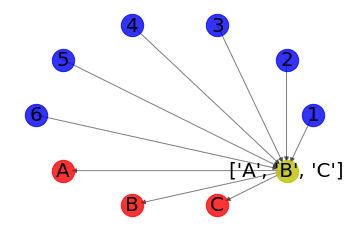

In [ ]:
pos = nx.shell_layout(G_f1)

# nodes
nx.draw_networkx_nodes(G_f1, pos,
                       nodelist=Nh_f1,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G_f1, pos,
                       nodelist=Nl_f1,
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G_f1, pos,
                       nodelist=Nc_f1,
                       node_color='y',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G_f1, pos, width=1.0, alpha=0.5)

# labels
nx.draw_networkx_labels(G_f1, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()
#Figure 1(a) from the paper

Figure 2

In [ ]:
[Nh_f2, Nl_f2, Nc_f2, E_prime_f2] = dedensification(Nh_f2, Nl_f2, E_f2) #the output for figure 2

In [ ]:
G_f2 = nx.DiGraph()
G_f2.add_nodes_from(N_f2)
G_f2.add_nodes_from(Nc_f2)
G_f2.add_edges_from(E_prime_f2)

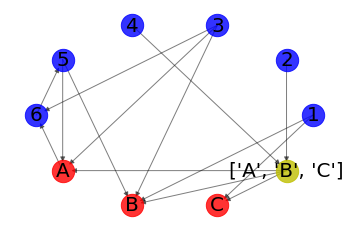

In [ ]:
pos = nx.shell_layout(G_f2)

# nodes
nx.draw_networkx_nodes(G_f2, pos,
                       nodelist=Nh_f2,
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G_f2, pos,
                       nodelist=Nl_f2,
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G_f2, pos,
                       nodelist=Nc_f2,
                       node_color='y',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G_f2, pos, width=1.0, alpha=0.5)

# labels
nx.draw_networkx_labels(G_f2, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()
#Figure 2(c) from the paper

# Implementation of the Tomas Feder 1985 algorithm

In [ ]:
#creating an easy example from previous task
N_f3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
E_f3 = [[1,9],
        [2,10], [2,11], [2,12], [2,13], [2,14], [2,15], [2,16],
        [3,10], [3,11], [3,12], [3,13], [3,14], [3,15], [3,16],
        [4,10], [4,11], [4,12], [4,13], [4,14], [4,15], [4,16],
        [5,10], [5,11], [5,12], [5,13], [5,14], [5,15], [5,16],
        [6,10], [6,11], [6,12], [6,13], [6,14], [6,15], [6,16],
        [7,10], [7,11], [7,12], [7,13], [7,14], [7,15], [7,16],
        [8,10], [8,11], [8,12], [8,13], [8,14], [8,15], [8,16]]

In [ ]:
#here it is undirected graph, which is different then before since we were working on DAGs
G_f3 = nx.Graph()
G_f3.add_nodes_from(N_f3[:8], bipartite=0)
G_f3.add_nodes_from(N_f3[8:], bipartite=1)
G_f3.add_edges_from(E_f3)

In [ ]:
nx.is_bipartite(G_f3)

True

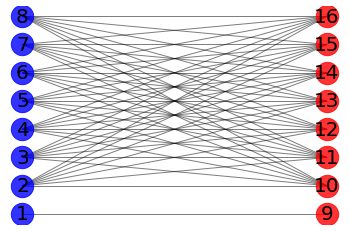

In [ ]:
pos = nx.bipartite_layout(G_f3, N_f3[:8])

# nodes
nx.draw_networkx_nodes(G_f3, pos,
                       nodelist=N_f3[:8],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G_f3, pos,
                       nodelist=N_f3[8:],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G_f3, pos, width=1.0, alpha=0.5)

# labels
nx.draw_networkx_labels(G_f3, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

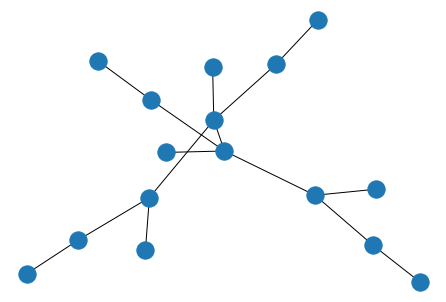

In [ ]:
G_bin = nx.binomial_tree(4)
nx.draw(G_bin)

Clique Stripping Algorithm and Partition

Input has to be U_n, V_n bipartite graph


In [ ]:
"""All supplementary functions that are later used in Neighborhood trees function"""

def Log2(x):
    if x == 0: 
        return false; 
  
    return (math.log10(x) / math.log10(2))

def isPowerOfTwo(n): 
    return (math.ceil(Log2(n)) == math.floor(Log2(n)))

def virtual_nodes(n):
  counter = 0
  while isPowerOfTwo(len(n)) == False:
    n.append('virtual_'+str(counter))
    counter += 1
  return n

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def all_chunks(n, h):
  """Yield all chunks needed for the binary tree"""
  l=list()
  for i in range(int(h+1)):
    l.append(list(chunks(n, int(len(n)/(2**i)))))
  return l

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

def Tree_degree(G, E, node_U, list_of_subsets):
  mapping_l = []
  E_n = [] #nodes that are connected with a given node
  for i in E:
    if i[0] == node_U:
      E_n.append(i[1])
  for i in list_of_subsets:
    mapping_l.append(len(intersection(E_n, i)))
  return mapping_l

def Tree_nodes(tree_height):
  return 2**(tree_height+1)-1 #formula for maximum nodes in a complete binary tree 2^(height+1)-1

def All_tree_nodes_list(tree_nodes, tree_height):
  lst = [*range(0, tree_nodes, 1)]
  lst2 = []
  counter = 0
  for i in range(tree_height+1):
    lst2.append(lst[counter:(counter+2**i)])
    counter += 2**i
  return lst2

In [ ]:
def Neighborhood_trees(U, V, E):

  length_original_V = len(copy.deepcopy(V))
  V_r = copy.deepcopy(V)
  V_r = virtual_nodes(V_r) #complementing the set of nodes V so it is an exponent of 2
  V_r = sorted(V_r[:length_original_V]) + V_r[length_original_V:] #add a subscribt to V so only first nodes that are not virtual are sorted
  initial_V = copy.deepcopy(V)
  tree_height = int(Log2(len(initial_V)))
  Trees = {}
  tree_nodes = Tree_nodes(tree_height)
  initial_E = copy.deepcopy(E)

  chunks_by_tree_level = all_chunks(initial_V, tree_height) #list of lists with level of the tree as first list
  chunks_by_tree_index = [x for l in chunks_by_tree_level for x in l] #list with all the chunks of the V by tree index

  """
  this for loop is creating all binary trees (one for each element in U) and
  adding degrees for all the nodes for all of the trees
  degree = to how many nodes from a given subset a node from U (for which the tree is created) is connected to
  """
  for i in U:
    Trees[i] = nx.generators.classic.balanced_tree(2, h=tree_height)
    mapping = dict(zip([*range(0, tree_nodes, 1)], Tree_degree(Trees[i], initial_E, i, chunks_by_tree_index)))
    mapping2 = dict(zip([*range(0, tree_nodes, 1)], chunks_by_tree_index))
    nx.set_node_attributes(G = Trees[i], values = mapping, name='degree')
    nx.set_node_attributes(G = Trees[i], values = mapping2, name='subset')
    mapping.clear()

  return Trees, V_r, tree_height

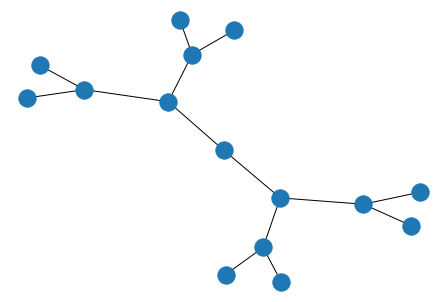

In [ ]:
nx.draw(nx.generators.classic.balanced_tree(2, h=3))

In [ ]:
def finding_the_treenode_based_on_path(path):
  tree_height = len(path)
  list_of_lvl = All_tree_nodes_list(Tree_nodes(tree_height), tree_height)
  last_lvl = list_of_lvl[-1]
  for i in path:
    if i == 0:
      last_lvl = last_lvl[:len(last_lvl)//2]
    else: # i==1
      last_lvl = last_lvl[len(last_lvl)//2:]
  return last_lvl[0]

def U_connected_to_y_t(U, E, y_t):
  U2 = []
  for i in E:
    if i[1] == y_t and i[0] in U:
      U2.append(i[0])
  return U2

def final_graph(U, V, E):
  new_E = []
  for i in E:
    if i[0] in U and i[1] in V:
      new_E.append(i)
  return [U, V, new_E]

def substracting_degree(T, U, path):
  nodes_passed_by_path = []
  chunks_of_list = []

  for i in range(len(path)):
    chunks_of_list.append(path[:i+1])

  for i in chunks_of_list:
    nodes_passed_by_path.append(finding_the_treenode_based_on_path(i))

  for i in U:
    for p in nodes_passed_by_path:
      if T[i].nodes[p]['degree'] > 0:
        new_value = T[i].nodes[p]['degree'] - 1
        nx.set_node_attributes(T[i], {p:new_value}, 'degree')
  
  return T

def calculating_k(n,m,delta): #n is number of nodes in U and V (seperatly in both, since their sizes are the same),
                              # m is number of edges, delta is parameter between 0 and 1
  return math.floor((delta*Log2(n))/(Log2((2*(n**2))/m)))

def deleting_node(T, node_number):
  for i in T.keys():
    T[i].remove_node(node_number)
  return T

def finding_the_V_based_on_path(path, T, key):
  tree_height = len(path)
  list_of_lvl = All_tree_nodes_list(Tree_nodes(tree_height), tree_height)
  last_lvl = list_of_lvl[-1]
  for i in path:
    if i == 0:
      last_lvl = last_lvl[:len(last_lvl)//2]
    else: # i==1
      last_lvl = last_lvl[len(last_lvl)//2:]
  try:
    return T[key].nodes[last_lvl[0]]['subset'][0]
def k_sized_subsets_out_of_S(k, S):
  try:
    return int(math.factorial(S)/(math.factorial(k)*math.factorial(S-k)))
  except ValueError:
    return 0

def last_existing(path, T, key):
  while T[key].has_node(finding_the_treenode_based_on_path(omega)) == False:
    if omega[-1] == 0:
      if T[key].has_node(finding_the_treenode_based_on_path(omega[:-1] + [1])) == True:
        omega = omega[:-1] + [1]
      else:
        omega = omega[:-1]
    else: #omega[-1] == 1
      if T[key].has_node(finding_the_treenode_based_on_path(omega[:-1] + [0])) == True:
        omega = omega[:-1] + [0]
      else:
        omega = omega[:-1]
  return omega



In [ ]:
def Clique_stripping_algorithm(U, V, E, T, t_height, delta, k):
  t = 1
  U_t = U
  V_t = V
  y_t_all = []

  while t < k:
    omega = []

    while len(omega) < t_height:
      c_0 = 0
      c_1 = 0
      
      """the try and except are needed here, since sometimes only one leaf out of 2 is left in the process, and then we just have to pick it"""

      for i in U_t:
        try:
          c_0 += T[i].nodes[finding_the_treenode_based_on_path(omega + [0])]['degree'] * k_sized_subsets_out_of_S((k-t), (T[i].nodes[finding_the_treenode_based_on_path(omega)]['degree']-1))
        except KeyError:
          pass
        try:
          c_1 += T[i].nodes[finding_the_treenode_based_on_path(omega + [1])]['degree'] * k_sized_subsets_out_of_S((k-t), (T[i].nodes[finding_the_treenode_based_on_path(omega)]['degree']-1))
        except KeyError:
          pass

      if c_0 >= c_1:
        if T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega)) == False and T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega[:-1] + [1])) == False:
          omega = last_existing(omega, T, U_t[0])
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [0])) == True:
          omega.append(0)
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [1])) == True:
          omega.append(1)
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [0])) == False and T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [1])) == False:
          omega = omega[:-1] + [1]
      else:
        if T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega)) == False and T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega[:-1]+[0])) == False:
          omega = last_existing(omega, T, U_t[0])
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [1])) == True:
          omega.append(1)
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [0])) == True:
          omega.append(0)
        elif T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [0])) == False and T[U_t[0]].has_node(finding_the_treenode_based_on_path(omega + [1])) == False:
          omega = omega[:-1] + [0]

    y_t_V = finding_the_V_based_on_path(omega, T, U_t[0]) #y_t from a set V perspective
    y_t_all.append(y_t_V)

    y_t_t = finding_the_treenode_based_on_path(omega) #y_t from a single tree perspective
    V_t.remove(y_t_V)
    U_t = U_connected_to_y_t(U_t, E, y_t_V)

    T = substracting_degree(T, U_t, omega)

    T = deleting_node(T, y_t_t)

    t += 1

  C = [U_t, y_t_all]

  return C

In [ ]:
def Edge_removal(E, clq):
  for u in clq[0]:
    for v in clq[1]:
      E.remove([u,v])
  return E

def cliques_formation(list_of_edges):
  new_list = []
  for i in list_of_edges:
    if isinstance(i[0], int):
      new_list.append([[i[0]], [i[1]]])
    else:
      new_list.append(i)
  return new_list

def convert_to_dict(list_of_cliques):
  d = {}
  for row in list_of_cliques:
    for k in row[1]:
      if tuple(row[0]) in d:
        d[tuple(row[0])].append(k)
      else:
        d[tuple(row[0])] = [k]
  return d

def reversed_dict(d):
  d_reversed = {}
  d_final = {}
  for i in d.keys(): #first for in loops are reversing the whole dictionary, replacing the keys with the values
    if tuple(d[i]) in d_reversed:
      for k in list(i):
        d_reversed[tuple(d[i])].append(k)
    else:
      d_reversed[tuple(d[i])] = list(i)
  
  for i in d_reversed.keys(): #second for in loops are reversing it back, so we can nicely fold our dictionary to create bigger cliques,
    if tuple(d_reversed[i]) in d_final: #that are easily visible
      for k in list(i):
        d_final[tuple(d_reversed[i])].append(k)
    else:
      d_final[tuple(d_reversed[i])] = list(i)

  return d_final

def new_nodes(clq):
  E_n = []
  N_c = []

  for q in clq.keys():

    if len(list(q))*len(clq[q]) > len(list(q)) + len(clq[q]): #optimisation constraint
      n_c = str(clq[q]) #introducing a new node
      for p in list(q):
        E_n.append([p, n_c])
      for s in clq[q]:
        E_n.append([n_c, s])
      N_c.append(n_c)

    else:
      for x in list(q):
        for y in clq[q]:
          E_n.append([x,y])
  return N_c, E_n

def new_nodes_l(clq):
  E_n = []
  N_c = []

  for q in clq:

    if len(q[0])*len(q[1]) > len(q[0]) + len(q[1]): #optimisation constraint
      n_c = str(q[1]) #introducing a new node
      for p in q[0]:
        E_n.append([p, n_c])
      for s in q[1]:
        E_n.append([n_c, s])
      N_c.append(n_c)

    else:
      for x in q[0]:
        for y in q[1]:
          E_n.append([[x],[y]])
  return N_c, E_n

In [ ]:
def Partition(U, V, E, delta):

  non_changable_V = copy.deepcopy(V)
  i = 0
  n = len(U)
  m_hat = len(E)
  clq_l = []
  k_hat = calculating_k(n,m_hat,delta)

  T, V_r, t_h = Neighborhood_trees(U, non_changable_V, E)
  V_r_for_output = copy.deepcopy(V_r)

  if k_hat < 2:

    EN = cliques_formation(E)

    N = []

    return [U, V_r_for_output, N, EN]

  while m_hat >= n**(2-delta) and k_hat > 1:

    clq = Clique_stripping_algorithm(U, V_r, E, T, t_h, delta, k_hat)
    
    clq_l.append(clq)

    E = Edge_removal(E, clq)
    m_hat = len(E)

    k_hat = calculating_k(n,m_hat,delta)
    
  clq_l = clq_l + E

  clq_l = cliques_formation(clq_l)

  N, EN = new_nodes_l(clq_l)

  return [U, V_r_for_output, N, EN]

In [ ]:
list_U = [1, 2, 3, 4, 5, 6, 7, 8]
list_V = [9, 10, 11, 12, 13, 14, 15, 16]
list_E = [[1,9],
          [2,10], [2,11], [2,12], [2,13], [2,14], [2,15], [2,16],
          [3,10], [3,11], [3,12], [3,13], [3,14], [3,15], [3,16],
          [4,10], [4,11], [4,12], [4,13], [4,14], [4,15], [4,16],
          [5,10], [5,11], [5,12], [5,13], [5,14], [5,15], [5,16],
          [6,10], [6,11], [6,12], [6,13], [6,14], [6,15], [6,16],
          [7,10], [7,11], [7,12], [7,13], [7,14], [7,15], [7,16],
          [8,10], [8,11], [8,12], [8,13], [8,14], [8,15], [8,16]]

In [ ]:
d_2 = Partition(list_U, list_V, list_E, delta=1)

In [ ]:
def reading_pos(file_name):
  edges = []
  with open(file_name, "r") as f:
    for line in f:
      edges.append([int(line.strip().split()[0]), int(line.strip().split()[1])])
  return edges

def assigning_files(path_1, path_2, folder_names):
  d = {}
  for i in folder_names:
    path = path_1 + str(i) + path_2
    d[i] = reading_pos(path)
  return d

def length_original(d):
  d_2 = {}
  counter = 1
  for i in d.keys():
    d_2[counter] = [len(d[i][0]), len(d[i][1]), len(d[i][2])]
    counter += 1
  return d_2

def prepare_for_Macconi(d, T):
  d_n = {}
  for i in d.keys():
    unpack = list(chain.from_iterable(d[i]))
    n = list(set(unpack))
    n_h, n_l = high_or_low(n, d[i], T)
    d_n[i] = [n_h, n_l, d[i]]
  return d_n

def prepare_for_Feder(d):
  d_f = {}
  for i in d.keys():
    U = []
    V = []
    for p in d[i]:
      U.append(p[0])
      V.append(p[1])
    U = list(set(U))
    V = list(set(V))
    d_f[i] = [U, V, d[i]]
  return d_f

def length_for_Macconi(d):
  d_2 = {}
  for i in d.keys():
    d_2[i] = [len(d[i][0]), len(d[i][1]), len(d[i][2])]
  return d_2

def length_for_Feder(d):
  d_2 = {}
  for i in d.keys():
    d_2[i] = [len(d[i][0]), len(d[i][1]), len(d[i][2])]
  return d_2

def lenght_for_Macconi_after(d):
  d_2 = {}
  for i in d.keys():
    d_2[i] = [len(d[i][0]), len(d[i][1]), len(d[i][2]), len(d[i][3])]
  
  length_pd = pd.DataFrame.from_records(d_2, index=['num of low degree nodes', 'num of high degree nodes',
                                                    'num of new introduced nodes', 'number of edges'])
  return length_pd

def k_per_data(d):
  d_2 = {}
  counter = 1
  for i in d.keys():
    d_2[counter] = calculating_k(d[i][0],d[i][2],1)
    counter+=1
  k_pd = pd.DataFrame.from_records(d_2, index=['k value'])

  return k_pd

def make_it_bipartite(d):
  d_2 = {}
  for i in d.keys():
    new_E = []
    U = []
    V = []

    for p in d[i]:
      U.append(p[0])
      V.append(p[1])
    U = list(set(U))
    V = list(set(V))

    inter = intersection(U, V)

    for p in d[i]:
      if p[0] not in inter and p[1] not in inter:
        new_E.append(p)

    d_2[i] = new_E

  return d_2

def save_bipartite(d):
  root = 'root'
  destination = 'destination'
  for i in d.keys():
    path = '/content/drive/My Drive/pickles bipartite/data_org_{}.pkl'.format(i) #for the pickles, please contact me on kacper.sawicz1@gmail.com
    exec('df_org_{} = pd.DataFrame(d[{}], columns=[root, destination])'.format(i, i))
    exec('df_org_{}.to_pickle(path)'.format(i))
  return 'saved'

def maximum_value(l1, l2):
  value = max(l1)
  if value < max(l2):
    value = max(l2)
  return value

def make_it_bipartite_samesize(d):
  d_2 = {}
  d_3 = {}
  for i in d.keys():
    new_E = []
    U = []
    V = []
    U2 = []

    for p in d[i]:
      U.append(p[0])
      V.append(p[1])
    U = sorted(list(set(U)))
    V = sorted(list(set(V)))

    max_val = maximum_value(U, V)

    inter = sorted(intersection(U, V))

    counter = 1
    for s in U:
      if s in inter:
        s = max_val + counter
        U2.append(s)
        counter += 1
      else:
        U2.append(s)

    for k in d[i]:
      if k[0] in U2:
        new_E.append(k)
      else:
        counter = max_val + 1 + inter.index(k[0])
        new_E.append([counter, k[1]])

    d_2[i] = new_E
    d_3[i] = [U2, V, new_E]

  return d_2, d_3

In [ ]:
folders = [1,2,3,5,8,9,10,11,13,16,17,18,19,20,21,22,23,26,27]
all_files = assigning_files('/content/drive/My Drive/Colab Notebooks/digraphs/', '/query.k2.pos', folders)

In [ ]:
are_they_bipartite = []
for i in all_files.keys():
  U = []
  V = []
  for p in all_files[i]:
    U.append(p[0])
    V.append(p[1])
  U = list(set(U))
  V = list(set(V))
  are_they_bipartite.append(len(intersection(U, V)))
are_they_bipartite
#none of the graphs is bipartite, I have to make them bipartite

[2, 72, 4, 7, 11, 12, 1, 1, 2, 71, 6, 9, 1, 21, 1, 2, 32, 18, 1]

In [ ]:
all_files_bi, all_files_bi_dic_tab = make_it_bipartite_samesize(all_files)

In [ ]:
length_a_f_bi = length_original(all_files_bi_dic_tab)
df_len_org_bi = pd.DataFrame.from_records(length_a_f_bi, index=['nodes in set U', 'nodes in set V', 'amount of edges'])

In [ ]:
df_len_org_bi

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
nodes in set U,89888,639,567,70,1282,1521,269,114,100,130,124,257,73,144,59,14514,1883,361,316
nodes in set V,16,123,83,132,157,374,152,119,329,189,93,184,61,1067,112,1481,909,80,3221
amount of edges,169796,17857,5331,573,1659,5251,596,330,578,5439,2211,313,164,13000,185,327128,100554,3050,421157


In [ ]:
#save_bipartite(all_files_bi) run to save the bipartite graphs on your drive

In [ ]:
all_files_feder = prepare_for_Feder(copy.deepcopy(all_files_bi))

In [ ]:
length_a_F = length_for_Feder(all_files_feder)
df_len_F = pd.DataFrame.from_records(length_a_F, index=['size of set U', 'size of set V', 'amount of edges'])

In [ ]:
df_len_F

,1,2,3,5,8,9,10,11,13,16,17,18,19,20,21,22,23,26,27
size of set U,89888,639,567,70,1282,1521,269,114,100,130,124,257,73,144,59,14514,1883,361,316
size of set V,16,123,83,132,157,374,152,119,329,189,93,184,61,1067,112,1481,909,80,3221
amount of edges,169796,17857,5331,573,1659,5251,596,330,578,5439,2211,313,164,13000,185,327128,100554,3050,421157


In [ ]:
#the algorithm will not run for k=0 and k=1, for k=2 it will run but not improve our results significantly

In [ ]:
k_per_data(length_a_F)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k value,0,1,1,1,0,1,1,1,1,2,1,0,1,4,1,1,1,1,-8


In [ ]:
all_files_Macconi_sim = prepare_for_Feder(copy.deepcopy(all_files_bi))

In [ ]:
length_a_M_sim = length_for_Macconi(all_files_Macconi_sim)
df_len_M_sim = pd.DataFrame.from_records(length_a_M_sim, index=['num of low degree nodes', 'num of high degree nodes', 'amount of edges'])

In [ ]:
df_len_M_sim

,1,2,3,5,8,9,10,11,13,16,17,18,19,20,21,22,23,26,27
num of low degree nodes,89888,639,567,70,1282,1521,269,114,100,130,124,257,73,144,59,14514,1883,361,316
num of high degree nodes,16,123,83,132,157,374,152,119,329,189,93,184,61,1067,112,1481,909,80,3221
amount of edges,169796,17857,5331,573,1659,5251,596,330,578,5439,2211,313,164,13000,185,327128,100554,3050,421157


In [ ]:
#now both of the algorithms will work with the same V nodes, so the results are somehow comparable

In [ ]:
def run_all_Macconi_org(d):
  d_2 = {}
  root = 'root'
  destination = 'destination'
  for i in d.keys():
    path = '/content/drive/My Drive/pickles Macconi/data_Mac_{}.pkl'.format(i)
    [NH, NL, NN, EN] = dedensification(d[i][1], d[i][0], d[i][2]) #one and zero are flipped becasue we have U and V sets to high and low degree
    d_2[i] = [NH, NL, NN, EN]
    #exec('df_Mac_{} = pd.DataFrame(d_2[{}][3], columns=[root, destination])'.format(i, i)) un-hash it if you want to save
    #3 above is so we choose only edges to save in pickles
    #exec('df_Mac_{}.to_pickle(path)'.format(i)) un-hash it if you want to save it on your drive

  return d_2

def run_all_Macconi_fast(d):
  d_2 = {}
  root = 'root'
  destination = 'destination'
  for i in d.keys():
    path = '/content/drive/My Drive/pickles Macconi/data_Mac_{}.pkl'.format(i)
    [NH, NL, NN, EN] = dedensification_fast(d[i][1], d[i][0], d[i][2]) #one and zero are flipped becasue we have U and V sets to high and low degree
    d_2[i] = [NH, NL, NN, EN]
    #exec('df_Mac_{} = pd.DataFrame(d_2[{}][3], columns=[root, destination])'.format(i, i)) un-hash it if you want to save
    #3 above is so we choose only edges to save in pickles
    #exec('df_Mac_{}.to_pickle(path)'.format(i)) un-hash it if you want to save

  return d_2

def run_all_Feder(d):
  d_2 = {}
  root = 'root'
  destination = 'destination'
  for i in d.keys():
    path = '/content/drive/My Drive/pickles Feder/data_Fed_{}.pkl'.format(i)
    graph = Partition(d[i][0], d[i][1], d[i][2], delta=1)
    #I am using delta as 1 all the time, I do not see a reason not to held it fixed
    d_2[i] = graph
    exec('df_Fed_{} = pd.DataFrame(d_2[{}][3], columns=[root, destination])'.format(i, i))
    #3 above is so we choose only edges to save in pickles
    exec('df_Fed_{}.to_pickle(path)'.format(i))

  return d_2

def is_bipartite(d):
  d_2 = {}
  for i in d.keys():
    cross = intersection(d[i][0], d[i][1])
    if len(cross) == 0:
      d_2[i] = 'is bipartite'
    else:
      d_2[i] = 'not bipartite'

  return d_2

def table_for_all_Macconi(d):
  d_2 = {}
  for i in d.keys():
    d_2[i] = [len(d[i][1]), len(d[i][0]), len(d[i][2]), len(d[i][3])]

  len_db_M = pd.DataFrame.from_records(d_2, index=['num of low degree nodes', 'num of high degree nodes', 'num of new nodes', 'amount of new edges'])

  return len_db_M

def table_difference_M(d_org, d_ded):
  d_diff = {}
  for i in d_org.keys():
    d_diff[i] = [len(d_org[i][2]), len(d_ded[i][3]), len(d_org[i][2]) - len(d_ded[i][3]), len(d_ded[i][3]) / len(d_org[i][2])]

  diff_M_db = pd.DataFrame.from_records(d_diff, index=['original number of edges', 'number of edges after dedensification', 'the difference of edges', 'ratio'])
  
  return diff_M_db

def table_for_all_Feder(d):
  d_2 = {}
  for i in d.keys():
    d_2[i] = [len(d[i][0]), len(d[i][1]), len(d[i][2]), len(d[i][3])]

  len_db_F = pd.DataFrame.from_records(d_2, index=['U', 'V', 'num of new nodes', 'amount of new edges'])

  return len_db_F

def table_difference_F(d_org, d_ded):
  d_diff = {}
  for i in d_org.keys():
    d_diff[i] = [len(d_org[i][2]), len(d_ded[i][3]), len(d_org[i][2]) - len(d_ded[i][3]), len(d_ded[i][3]) / len(d_org[i][2])]

  diff_F_db = pd.DataFrame.from_records(d_diff, index=['original number of edges', 'number of edges after dedensification', 'the difference of edges', 'ratio'])
  
  return diff_F_db

In [ ]:
all_files_feder = prepare_for_Feder(copy.deepcopy(all_files_bi))

# My Dednsification Algorith for bipartite graphs Sawicz 2020


In [ ]:
"""
This is an algorith I created while trying to improve Feder algorithm, it works quite well on its own. The way of working is very simple, we create
a dictionary of our edges, which makes the edges get grouped by node, and by reversing the dictionary we group it by destinations.
"""
def dictionary_folding(E):
  E_hat = copy.deepcopy(E)

  clq = cliques_formation(E_hat)

  clq_d = convert_to_dict(clq)

  counter1 = 1 #just so we execute the first loop
  counter2 = 0

  while counter2 < counter1:
    
    counter1 = len(clq_d.keys())

    clq_d = reversed_dict(clq_d)
    
    counter2 = len(clq_d.keys())

  N, EN = new_nodes(clq_d)

  return(N, EN)

def run_all_Kacper(d):
  d_2 = {}
  root = 'root'
  destination = 'destination'
  for i in d.keys():
    path = '/content/drive/My Drive/pickles Kacper/data_Kac_{}.pkl'.format(i)
    [NN, EN] = dictionary_folding(d[i])
    d_2[i] = [NN, EN]
    exec('df_Kac_{} = pd.DataFrame(d_2[{}][1], columns=[root, destination])'.format(i, i))
    #1 above is so we choose only edges to save in pickles
    exec('df_Kac_{}.to_pickle(path)'.format(i))

  return d_2

def performance_table_Kacper(d):
  length_l = {}
  for i in d.keys():
    length_l[i] = [len(d[i][0]), len(d[i][1])]
  len_db = pd.DataFrame.from_records(length_l, index=['num of new nodes', 'amount of new_edges'])
  return len_db

def table_difference_K(d_org, d_ded):
  d_diff = {}
  for i in d_org.keys():
    d_diff[i] = [len(d_org[i]), len(d_ded[i][1]), len(d_org[i]) - len(d_ded[i][1]), len(d_ded[i][1]) / len(d_org[i]), len(d_ded[i][0])]

  diff_M_db = pd.DataFrame.from_records(d_diff, index=['original number of edges', 'number of edges after dedensification',
                                                       'the difference of edges', 'ratio', 'newly introduced nodes'])
  
  return diff_M_db

In [ ]:
def dedensification_fast(N_h, N_l, E):

  N_c = []
  E_improvement = []
  E_to_add = []
  E_f = []

  for i in E:
    if i[1] in N_h:
      E_improvement.append(i)
    else:
      E_to_add.append(i)

  N_c, E_clq = dictionary_folding(E_improvement)

  E_f = E_clq + E_to_add


  return [N_h, N_l, N_c, E_f]

# Comparison between the original algorithm and the algorithm with dictionaries

They are the same, which means we can freely use the fast version of the algorithm

In [ ]:
def V_density(d):
  d_2 = {}
  
  for i in d.keys():
    d_map = {}
    V_s = sorted(d[i][1]) #V
    V_density = []

    for s in V_s:
      d_map[s] = 0

    for p in d[i][2]: #edges
      if p[1] in d_map.keys():
        d_map[p[1]] += 1

    for x in d_map.keys():
      V_density.append(d_map[x])

    d_2[i] = sorted(V_density)

    d_map.clear()

  return d_2

In [ ]:
V_dens = V_density(all_files_bi_dic_tab)

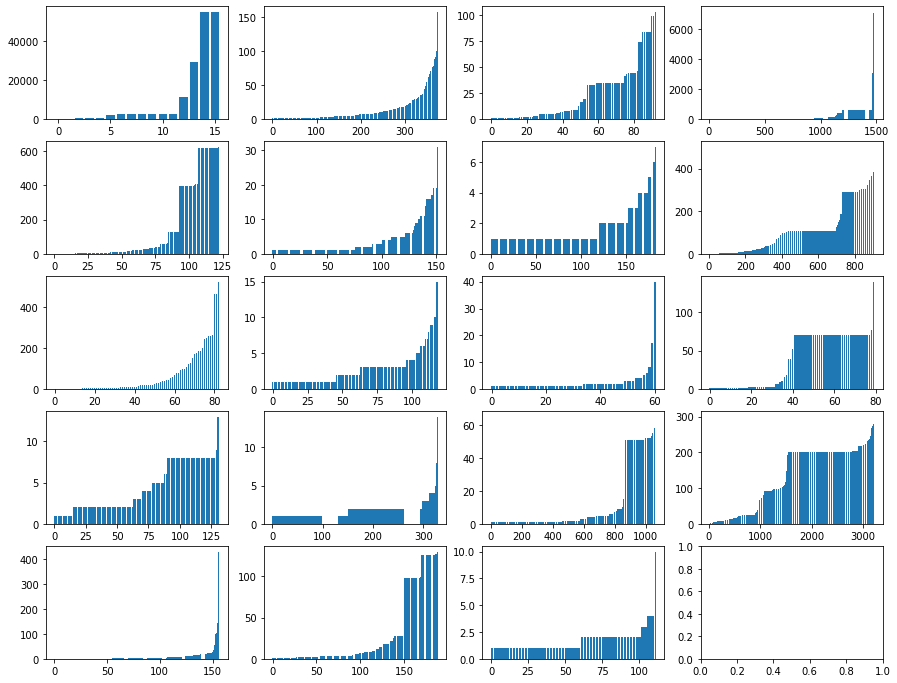

In [ ]:
counter_1 = 0
counter_2 = 0
fig, axs = plt.subplots(5,4)
fig.set_size_inches(15,12)

for i in V_dens.keys():
  
  axs[counter_1, counter_2].bar(range(len(V_dens[i])), V_dens[i])# check before running

  if counter_1 < 4:
    counter_1 += 1
  else:
    counter_1 = 0
    counter_2 += 1

plt.savefig('/content/drive/My Drive/tables thesis/density overview.png')

In [ ]:
def All_T(V):
  all_T = list(set(V))
  return all_T

def find_best_T(U, V, E, V_density):
  d_T = {}
  values_of_T = All_T(V_density)
  for i in values_of_T:
    N_h, N_l = high_or_low(U+V, E, i)
    [N_h, N_l, N_c, E_f] = dedensification_fast(N_h, N_l, E)
    d_T[i] = [N_h, N_l, N_c, E_f]
  return d_T

In [ ]:
queries = {
1:'(^<isLocatedIn>#^<owns>#^<created>)+',
2:'(^<hasCapital>#^<isLocatedIn>#^<dealsWith>)+',
3:'(^<owns>#^<isLocatedIn>#^<dealsWith>)+',
4:'(^<participatedIn>#^<isLocatedIn>#^<dealsWith>)+',
5:'(^<hasCapital>#^<participatedIn>#^<happenedIn>)+',
6:'(^<isInterestedIn>#^<influences>#^<hasAcademicAdvisor>)+',
7:'(^<isLocatedIn>#^<dealsWith>#^<hasCapital>)+',
8:'(^<owns>#^<isLocatedIn>#^<hasCapital>)+',
9:'(^<participatedIn>#^<happenedIn>#^<hasCapital>)+',
10:'(^<influences>#^<isMarriedTo>#^<hasChild>)+',
11:'(^<isMarriedTo>#^<influences>#^<hasChild>)+',
12:'(^<hasAcademicAdvisor>#^<isInterestedIn>#^<influences>)+',
13:'(^<isMarriedTo>#^<hasChild>#^<influences>)+',
14:'(^<isLocatedIn>#^<owns>#^<isConnectedTo>)+',
15:'(^<influences>#^<hasAcademicAdvisor>#^<isInterestedIn>)+',
16:'(^<dealsWith>#^<hasCapital>#^<isLocatedIn>)+',
17:'(^<dealsWith>#^<owns>#^<isLocatedIn>)+',
18:'(^<hasCapital>#^<owns>#^<isLocatedIn>)+',
19:'(^<owns>#^<created>#^<isLocatedIn>)+',
20:'(^<owns>#^<isConnectedTo>#^<isLocatedIn>)+',
21:'(^<hasChild>#^<influences>#^<isMarriedTo>)+',
22:'(^<created>#^<isLocatedIn>#^<owns>)+',
23:'(^<isConnectedTo>#^<isLocatedIn>#^<owns>)+',
24:'(^<isLocatedIn>#^<dealsWith>#^<owns>)+',
25:'(^<isLocatedIn>#^<hasCapital>#^<owns>)+',
26:'(^<happenedIn>#^<hasCapital>#^<participatedIn>)+',
27:'(^<isLeaderOf>#^<dealsWith>#^<participatedIn>)+',
}

In [ ]:
queries_rep = {}
for i in queries.keys():
  queries_rep[i] = queries[i].replace('^', ':')
  queries_rep[i] = queries_rep[i].replace('#', '/')

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
lst_tab = pd.DataFrame(queries_rep, index=['query'])
last_table = pd.DataFrame.transpose(lst_tab)
last_table

,query
1,(:<isLocatedIn>/:<owns>/:<created>)+
2,(:<hasCapital>/:<isLocatedIn>/:<dealsWith>)+
3,(:<owns>/:<isLocatedIn>/:<dealsWith>)+
4,(:<participatedIn>/:<isLocatedIn>/:<dealsWith>)+
5,(:<hasCapital>/:<participatedIn>/:<happenedIn>)+
6,(:<isInterestedIn>/:<influences>/:<hasAcademicAdvisor>)+
7,(:<isLocatedIn>/:<dealsWith>/:<hasCapital>)+
8,(:<owns>/:<isLocatedIn>/:<hasCapital>)+
9,(:<participatedIn>/:<happenedIn>/:<hasCapital>)+
10,(:<influences>/:<isMarriedTo>/:<hasChild>)+
